<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Downloading-libraries" data-toc-modified-id="Downloading-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Downloading libraries</a></span></li><li><span><a href="#Strenkert's-Coexpression-Network" data-toc-modified-id="Strenkert's-Coexpression-Network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strenkert's Coexpression Network</a></span><ul class="toc-item"><li><span><a href="#Prepping-Expression-Data" data-toc-modified-id="Prepping-Expression-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prepping Expression Data</a></span></li><li><span><a href="#Cluster-Dendrogram" data-toc-modified-id="Cluster-Dendrogram-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cluster Dendrogram</a></span><ul class="toc-item"><li><span><a href="#Plot-the-R2-values-as-a-function-of-the-soft-thresholds" data-toc-modified-id="Plot-the-R2-values-as-a-function-of-the-soft-thresholds-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Plot the R<sup>2</sup> values as a function of the soft thresholds</a></span></li></ul></li></ul></li><li><span><a href="#Model-Construction" data-toc-modified-id="Model-Construction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Construction</a></span><ul class="toc-item"><li><span><a href="#Choosing-Top-Hub-In-Each-Module" data-toc-modified-id="Choosing-Top-Hub-In-Each-Module-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choosing Top Hub In Each Module</a></span></li><li><span><a href="#Genes-in-each-module-(bentsen-rausch-2019)" data-toc-modified-id="Genes-in-each-module-(bentsen-rausch-2019)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Genes in each module (bentsen-rausch 2019)</a></span></li><li><span><a href="#Calculating-Intramodular-Connectivity" data-toc-modified-id="Calculating-Intramodular-Connectivity-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calculating Intramodular Connectivity</a></span></li></ul></li></ul></div>

In [12]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("impute")
# install.packages("WGCNA")
# BiocManager::install('flashClust')

# Downloading libraries

In [1]:
library(WGCNA)
library(flashClust)
library(curl)
library(igraph)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘flashClust’


The following object is masked from ‘package:fastcluster’:

    hclust


The following object is masked from ‘package:stats’:

    hclust


Using libcurl 7.71.1 with OpenSSL/1.1.1u


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# Strenkert's Coexpression Network

## Prepping Expression Data

In [2]:
strenkert.data <- read.csv('/research/projects/chlamydomonas/MAexpression/genome_info/Strenkert_coexpression_network/Strenkert_coexpression_values.csv', skip = 1)
expression.data <- strenkert.data[, -c(1:3, 20:25)]
expression.data <- as.data.frame(t(expression.data))
names(expression.data) <- strenkert.data$LocusID

## Cluster Dendrogram

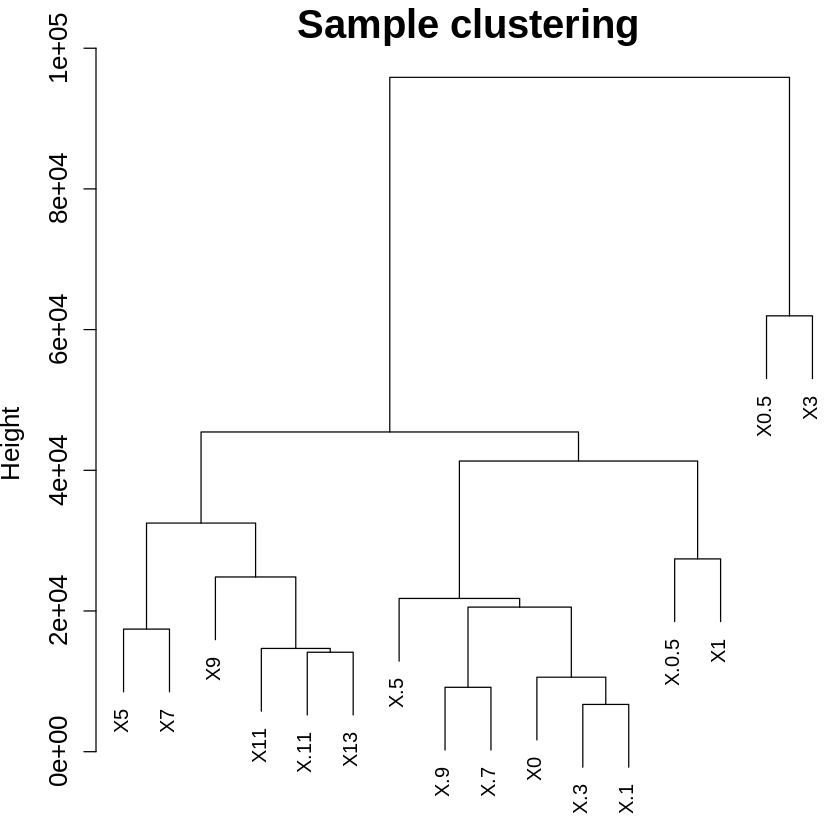

In [3]:
sampleTree <- hclust(dist(expression.data), method = "average") #Clustering samples based on distance 

#Setting the graphical parameters
par(cex = 1);
par(mar = c(0,4,2,0))

#Plotting the cluster dendrogram
plot(sampleTree, main = "Sample clustering", sub = "", xlab = "", cex.lab = 1.3, cex.axis = 1.3, cex.main = 2)

In [4]:
spt <- pickSoftThreshold(expression.data)
spt

Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1 : 2510 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 2511 : 5020 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 5021 : 7530 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 7531 : 10040 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 10041 : 12550 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 12551 : 15060 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 15061 : 17570 .”
Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 17571 : 17824 .”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.4300  4.250          0.373  6570.0    6780.0   8430
2      2   0.9040  1.630          0.930  3450.0    3580.0   5300
3      3   0.4860  0.777          0.842  2130.0    2210.0   3780
4      4   0.0433  0.176          0.659  1440.0    1500.0   2890
5      5   0.0467 -0.194          0.641  1040.0    1080.0   2300
6      6   0.1890 -0.434          0.692   785.0     807.0   1890
7      7   0.2990 -0.601          0.739   613.0     621.0   1580
8      8   0.3760 -0.732          0.770   492.0     487.0   1350
9      9   0.4200 -0.852          0.775   403.0     389.0   1170
10    10   0.4530 -0.939          0.783   336.0     315.0   1030
11    12   0.4910 -1.080          0.787   244.0     215.0    813
12    14   0.5230 -1.140          0.787   185.0     154.0    663
13    16   0.5250 -1.200          0.756   145.0     114.0    552
14    18   0.5300 -1.240          0.728   116.0      86.2    469
15    20   0.5670 -1.180 

Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.43049776,4.2484251,0.3730042,6574.26733,6783.60897,8425.0124
2,0.90360870,1.6277381,0.9302758,3449.55047,3578.57111,5300.8090
3,0.48590898,0.7770262,0.8415121,2125.79966,2206.96657,3784.5183
4,0.04332259,0.1761965,0.6587844,1440.31308,1498.64815,2888.1111
5,0.04673705,-0.1935482,0.6409811,1039.37491,1080.13983,2300.0842
6,0.18909438,-0.4340026,0.6917671,784.67701,806.89785,1887.5977
7,0.29911954,-0.6011017,0.7393938,612.88219,621.24490,1584.3263
8,0.37569574,-0.7323041,0.7696336,491.59842,487.04655,1353.4179
9,0.42022962,-0.8515490,0.7752953,402.84215,389.20831,1172.7547


### Plot the R<sup>2</sup> values as a function of the soft thresholds

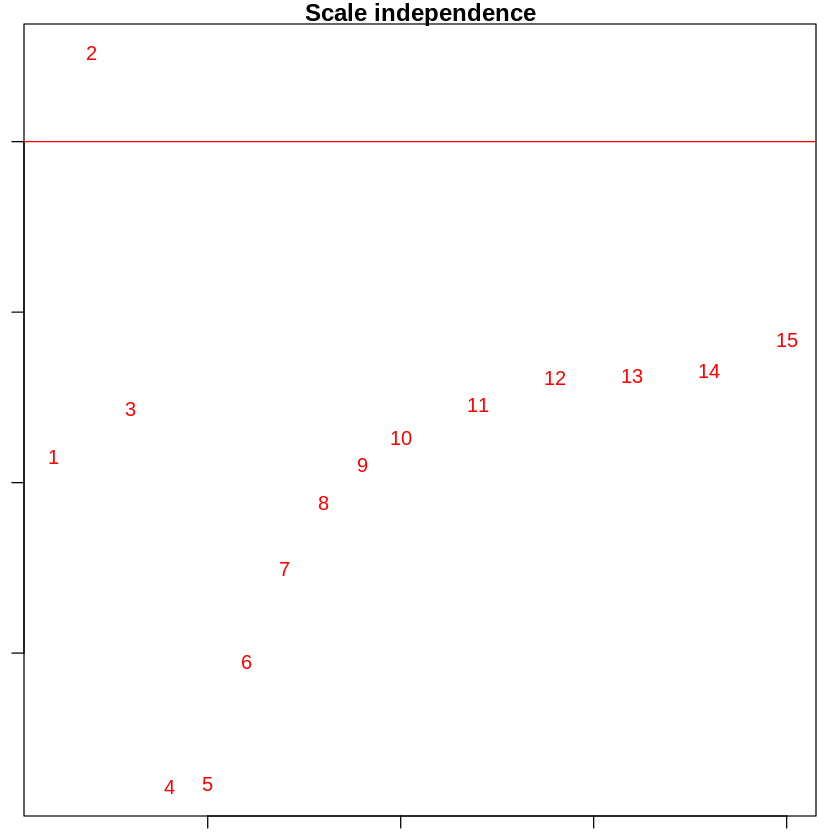

In [5]:
par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1],spt$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"))
text(spt$fitIndices[,1],spt$fitIndices[,2],col="red")
abline(h=0.80,col="red")

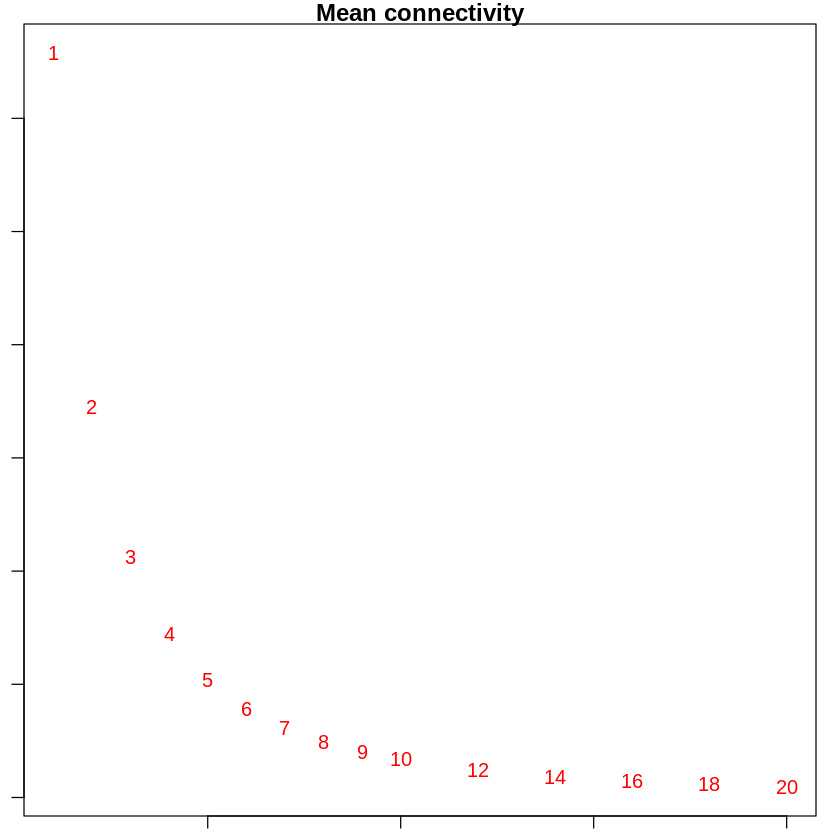

In [6]:
### Maximize both R square and mean connectivity
par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1], spt$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(spt$fitIndices[,1], spt$fitIndices[,5], labels= spt$fitIndices[,1],col="red")

## Soft threshold should be set to 2 because it passes the R^2 threshold while maximizing mean connectivity

In [4]:
### Creating an adjacency matrix

softPower <- 2
adjacency <- adjacency(expression.data, power = softPower)

# Model Construction

In [5]:
## Transform the adjacency matrix into a gene similarity matrix that measures the distance of a gene from other geens in the same system
## Dissimilarity is traditionally used for cluster analyses

####################################
#### Topological Overlap Matrix ####
####################################

TOM <- TOMsimilarity(adjacency)
TOM.dissimilarity <- 1 - TOM

##########################################
#### Hierarchical Clustering Analysis ####
##########################################
geneTree <- hclust(as.dist(TOM.dissimilarity), method = "average") # creating the dendrogram

sizeGrWindow(12,9) #plotting the dendrogram
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity", labels = FALSE, hang = 0.04)

Modules <- cutreeDynamic(dendro = geneTree, distM = TOM.dissimilarity, deepSplit = 2, pamRespectsDendro = FALSE, minClusterSize = 30)

table(Modules)

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
 ..cutHeight not given, setting it to 0.995  ===>  99% of the (truncated) height range in dendro.
 ..done.


Modules
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  10 1812 1770 1512 1133 1067 1023 1009  925  770  699  628  599  528  524  456 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 382  365  360  329  287  281  253  242  170  139  107  102   91   81   72   64 
  32 
  34 

In [6]:
ModuleColors <- labels2colors(Modules)
table(ModuleColors) ## provides the number of genes within each module

ModuleColors
        black          blue         brown          cyan     darkgreen 
         1009          1770          1512           524           253 
     darkgrey    darkorange       darkred darkturquoise         green 
          170           107           281           242          1067 
  greenyellow          grey        grey60     lightcyan    lightgreen 
          628            10           365           382           360 
  lightyellow       magenta  midnightblue        orange paleturquoise 
          329           770           456           139            64 
         pink        purple           red     royalblue   saddlebrown 
          925           699          1023           287            81 
       salmon       skyblue     steelblue           tan     turquoise 
          528            91            72           599          1812 
       violet         white        yellow 
           34           102          1133 

,MEblack,MEblue,MEbrown,MEcyan,MEdarkgreen,MEdarkgrey,MEdarkorange,MEdarkred,MEdarkturquoise,MEgreen,⋯,MEroyalblue,MEsaddlebrown,MEsalmon,MEskyblue,MEsteelblue,MEtan,MEturquoise,MEviolet,MEwhite,MEyellow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X.11,0.02224406,-0.14223177,-0.16985738,-0.2354263,-0.32403179,-0.24467395,0.21071305,-0.18126827,-0.35293197,0.42868468,⋯,-0.07393688,0.145689686,-0.10480338,0.17018775,-0.001536422,0.05584206,0.03184129,-0.193804757,-0.08070766,0.42664844
X.9,-0.12068216,-0.09687676,-0.22900812,-0.0678493,-0.30494827,-0.12708285,0.37867151,-0.02074802,-0.27626903,0.35929645,⋯,0.19903020,-0.057193164,0.03514202,0.06465139,-0.279000651,-0.14226956,0.16808536,-0.003341121,-0.22830479,0.12934949
X.7,-0.12950178,-0.09912125,-0.17352628,0.1355505,-0.18069418,0.16134076,0.17789602,0.07084908,-0.03609930,0.11074842,⋯,0.35441437,-0.005062909,0.14881832,-0.01135355,-0.276827171,-0.16232892,0.26349243,0.184437295,-0.12124286,-0.07912379
X.5,-0.14217906,-0.08561084,-0.15882532,0.2634022,-0.07660977,0.26342354,0.03580607,0.13963354,0.05718536,0.01029094,⋯,0.35255621,0.010835546,0.21366234,-0.06932578,-0.234260595,-0.15906468,0.31132402,0.177164096,-0.06002698,-0.12978655
X.3,-0.04051685,-0.05604824,-0.15396670,0.3349118,0.02544311,0.27891951,-0.08303746,0.19334126,0.08202154,-0.05657131,⋯,0.26087325,-0.006167526,0.27611178,-0.15012724,-0.213890097,-0.15913574,0.29982169,0.175740401,-0.04933560,-0.16863340
X.1,0.69626034,-0.08897111,-0.12839613,0.2649312,0.06406908,0.24341377,-0.30810003,0.09605828,0.05610410,-0.09521040,⋯,0.06631955,-0.018868436,0.20833181,-0.13429609,-0.112202119,-0.12033206,0.14921015,0.029727722,-0.02425024,-0.15689297
X.0.5,-0.12618324,-0.03835610,-0.13763319,0.4060889,0.11252788,0.36992766,-0.23932482,0.23085913,0.10849656,-0.07259422,⋯,0.19684111,0.041362597,0.29558457,-0.17816991,-0.146982795,-0.13302422,0.27477589,0.066260701,0.01993856,-0.16849953
X0,-0.12836786,-0.02772385,-0.14524061,0.4366644,0.13267402,0.35989090,-0.24063348,0.25719337,0.11300927,-0.07585360,⋯,0.18156843,0.032812796,0.32795611,-0.14864482,-0.161773940,-0.13886284,0.29440161,0.072102601,0.02817661,-0.17277543
X0.5,-0.13076648,0.84049947,-0.13378845,-0.1036523,0.62680081,-0.39498560,-0.34297509,0.58413546,-0.26514866,-0.22563686,⋯,-0.52084722,-0.368428730,0.22810493,-0.35323083,0.138125810,-0.17297481,-0.21441995,-0.514079329,-0.33268053,-0.16642049


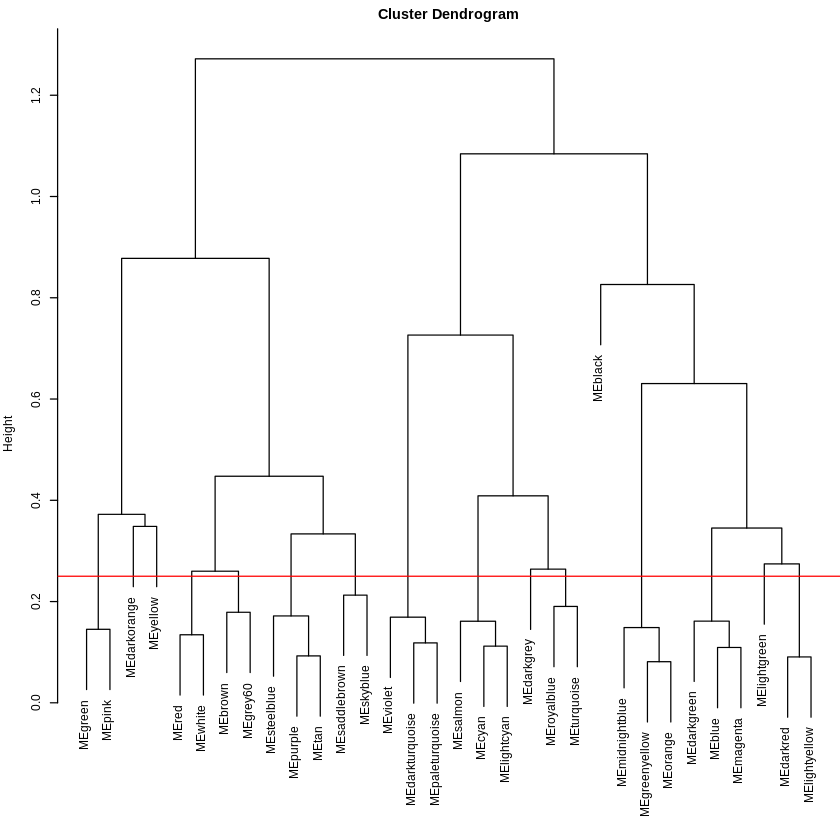

In [8]:
#### Module Eigengene Identification ####
#########################################

# Module eigengene is the standarized gene expression profile for a given module
MElist <- moduleEigengenes(expression.data, colors = ModuleColors) 
MEs <- MElist$eigengenes 
MEs <- subset(MEs, select = -c(MEgrey)) #dropping the grey module only contains 10 genes with NA eigenvalues
MEs

# Merging modules with similar expression profiles
ME.dissimilarity = 1-cor(MEs, use="complete")

METree = hclust(as.dist(ME.dissimilarity), method = "average") #Clustering eigengenes 
par(mar = c(0,4,2,0)) #seting margin sizes
par(cex = 0.6);#scaling the graphic
plot(METree)
abline(h=.25, col = "red") #setting up cutoff to merge modules 75% or more correlated

 mergeCloseModules: Merging modules whose distance is less than 0.25
   Calculating new MEs...


Warning message in signedKME(expression.data, mergedMEs):
“Some genes are constant. Hint: consider removing constant columns from datExpr.”


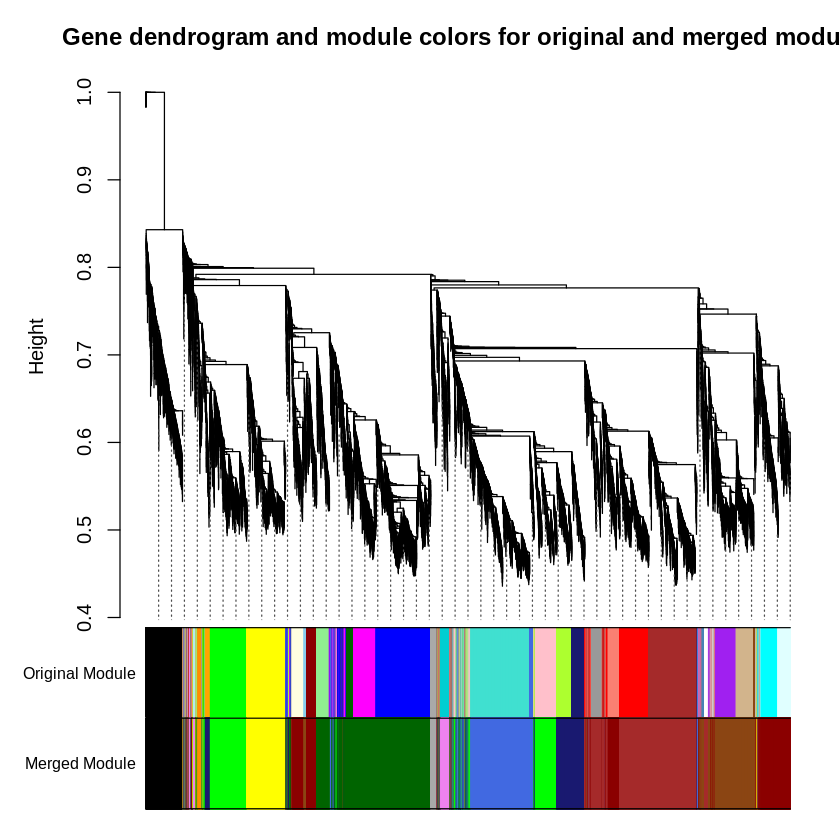

In [9]:
merge <- mergeCloseModules(expression.data, ModuleColors, cutHeight = .25) # The merged module colors, assigning one color to each module
mergedColors = merge$colors
mergedMEs = merge$newMEs # Eigengenes of the new merged modules
modulekME <- signedKME(expression.data, mergedMEs) ## calculating signed correlation between eigengenes
# Intramodular connectivity tends to be harder to find, so KMe is used as a good estimation of a genes connectivity 

plotDendroAndColors(geneTree, cbind(ModuleColors, mergedColors), 
c("Original Module", "Merged Module"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05,
main = "Gene dendrogram and module colors for original and merged modules")

In [10]:
table(mergedColors) ## provides the number of genes within each merged module

mergedColors
       black        brown    darkgreen     darkgrey   darkorange      darkred 
        1009         3002         3153          170          107         2044 
       green         grey midnightblue    royalblue  saddlebrown       violet 
        1992           10         1223         2099         1542          340 
      yellow 
        1133 

## Choosing Top Hub In Each Module

In [14]:
chooseTopHubInEachModule(expression.data, mergedColors, omitColors = "grey", power = 2, type = 'unsigned')

black           brown       darkgreen        darkgrey      darkorange 
"Cre13.g595114" "Cre15.g637282" "Cre12.g521000" "Cre02.g094801" "Cre16.g680000" 
        darkred           green    midnightblue       royalblue     saddlebrown 
"Cre03.g203700" "Cre10.g466800" "Cre16.g649250" "Cre10.g454000" "Cre16.g668000" 
         violet          yellow 
"Cre11.g475750" "Cre11.g468450"

## Genes in each module (bentsen-rausch 2019)

In [79]:
modules <- mergedMEs
c_modules <- data.frame(mergedColors)
row.names(c_modules) <- colnames(expression.data) 
module.list.set1 <- substring(colnames(modules), 3)
index.set1 <- 0
Network <- list()
for (i in 1:length(module.list.set1)) {
  index.set1 <- which(c_modules == module.list.set1[i])
  Network[[i]] <- row.names(c_modules)[index.set1]
}
names(Network) <- module.list.set1

#### Converting Network into a dataframe ####
l <- tibble::lst(Network$saddlebrown, Network$yellow, Network$darkorange, Network$green, Network$darkred, Network$darkgrey,
                Network$royalblue, Network$brown, Network$violet, Network$black, Network$darkgreen, Network$midnightblue,
                Network$grey)
Network_df <- data.frame(lapply(l, `length<-`, max(lengths(l))))
write.csv(Network_df, file = "/research/projects/chlamydomonas/MAexpression/genome_info/Strenkert_coexpression_network/Genes_in_each_module.csv")

## Calculating Intramodular Connectivity

In [16]:
#### Non-scaled scores of intramodular connectivity ####
mergedkIM = intramodularConnectivity(adjacency, mergedColors, scaleByMax = FALSE)
mergedkIM = mergedkIM[order(mergedkIM$kWithin, decreasing = TRUE), ]
write.csv(mergedkIM, file = "/research/projects/chlamydomonas/MAexpression/genome_info/Strenkert_coexpression_network/intramodular_connectivity.csv")

#### Scaled scores of intramodular connectivity ####
mergedkIM = intramodularConnectivity(adjacency, mergedColors, scaleByMax = TRUE)
mergedkIM = mergedkIM[order(mergedkIM$kWithin, decreasing = TRUE), ]
write.csv(mergedkIM, file = "/research/projects/chlamydomonas/MAexpression/genome_info/Strenkert_coexpression_network/intramodular_connectivity_scaled.csv")